In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n, alfa):
        self.W = np.random.uniform(-1, 1, n)
        #self.W[0] = 0.5
        #self.W[1] = 0.5
        self.b = np.random.uniform(-1, 1, 1)
        #self.b = -0.5
        self.alfa = alfa
        
    def train(self, X, T):
        
        epoch = 0
        
        found_error = True
        while(found_error):
            epoch += 1
            #print(f"Epoch: {epoch}")
            found_error = False
            for x, t in zip(X, T):
                #print(f"x: {x}, t: {t}")
                #print(f"Dot: {x}.{self.W} = {np.dot(self.W, x)} + {self.b}")
                a = np.heaviside(np.dot(self.W, x) - self.b, 1)
                #print(f"\n{x} {t} vs {a}")
                if(a != t):
                    found_error = True
                    #print(f"Anterior: {self.W}, {self.b}")
                    #self.W += self.alfa * (t - a) * x
                    self.W[0] += self.alfa * (t - a) * x[0]
                    self.W[1] += self.alfa * (t - a) * x[1]
                    self.b -= self.alfa * (t - a)
                    #print(f"Nuevo: {self.W}, {self.b}\n")
                    
    def classify(self, x):
        return np.heaviside(np.dot(self.W, x) - self.b, 1)


W: [-0.67146899 -0.88067785], b: [-0.49252221]


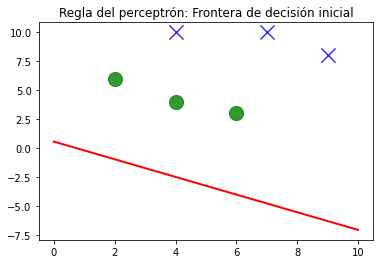

In [2]:
perceptron_1 = Perceptron(2, 0.25)
print(f"W: {perceptron_1.W}, b: {perceptron_1.b}")

X = np.array([[2, 6], [4, 4], [6, 3], [4, 10], [7, 10], [9, 8]])
T = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])

#X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#T = np.array([0, 1, 1, 1])

x1 = np.linspace(0, 10)
x2 = perceptron_1.b / perceptron_1.W[1] - (x1 * perceptron_1.W[0] / perceptron_1.W[1])

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

W: [0.07853101 0.61932215], b: [4.00747779]


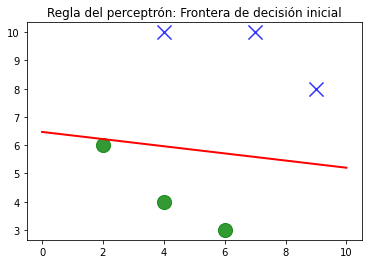

In [3]:
#print(f"W: {perceptron_1.W}, b: {perceptron_1.b}")
perceptron_1.train(X, T)
print(f"W: {perceptron_1.W}, b: {perceptron_1.b}")

x1 = np.linspace(0, 10)
x2 = (perceptron_1.b / perceptron_1.W[1]) - (x1 * perceptron_1.W[0] / perceptron_1.W[1])

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

Result class for [5 5]: 0.0
Result class for [6 8]: 1.0


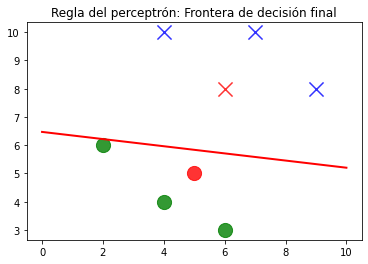

In [5]:
test_data = np.array([[5, 5], [6, 8]])
test_data_classes = np.zeros(2)

for i in range(np.shape(test_data)[0]):
    pattern_class = perceptron_1.classify(test_data[i])
    test_data_classes[i] = pattern_class
    print(f"Result class for {test_data[i]}: {test_data_classes[i]}")
    

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)    
    
for x, t in zip(X, T):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)
        
for x, t in zip(test_data, test_data_classes):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'r', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'r', s = 200, marker = 'x', alpha = 0.8)    

plt.title('Regla del perceptrón: Frontera de decisión final')
plt.show()    